<a href="https://colab.research.google.com/github/dipto8103/Real-Estate-Price-Prediction/blob/main/Final_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
    <h1><center style="background-color:#C39BD3; color:white;">🏠 Housing Prices in Indian Metropolitan Areas</center></h1>
</div>

<div>
<img src="https://i.imgur.com/Q5IhUpF.gif">
</div>

<div class="alert alert-warning">
<p>Being born and brought up in a metropolitan city, I've witnessed the city develop and the housing prices rise depending on the availability of amenities in a particular region. This was my motivation of putting together a dataset for analysis 😄 <br><br>
Now let's delve into the factors that govern the pricing!
</p>
</div>

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Importing Libraries 📚</strong></center></h3>
</div>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import math
import plotly.graph_objects as go
import plotly.express as px
!pip install eli5
import eli5
import graphviz
import networkx as nx

from eli5.sklearn import PermutationImportance
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from sklearn import tree
from matplotlib import pyplot as plt
!pip install pdpbox
from pdpbox import pdp, info_plots
from string import ascii_letters
!pip install colorama
from colorama import Fore, Back, Style
import geopy
from geopy.geocoders import Nominatim
from concurrent.futures import ThreadPoolExecutor
#!pip install Helpers
#!pip show Helpers
#import Helpers
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=d6dfe977becfa6b7d2e097aadb305a88005689de2298b5b21f407a29c71f4414
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install geopy
!pip install Nominatim
!pip install folium

  Preparing metadata (setup.py) ... done
  Created wheel for Nominatim: filename=nominatim-0.1-py3-none-any.whl size=2345 sha256=69b900daded9abfc44df232f424cf0523eadf49e20ed84a25c1f1a1864071b3e
  Stored in directory: /root/.cache/pip/wheels/f8/07/74/000f7fd9ad62e9835eb5c224cef28c0aceb3b25c1a8c8a9891
Successfully built Nominatim


<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Custom Color Palette 🎨</strong></center></h3>
</div>

In [ ]:
custom_colors = ["#4e89ae", "#c56183", "#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

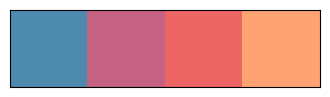

In [ ]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

<center style="background: #93C0A4; font-size: 20px; padding: 10px; border: 1px solid lightgray; margin: 10px; width:100px; color:white;">
    Mumbai
</center>

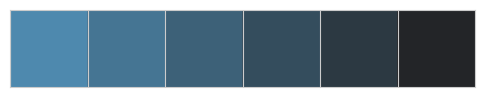

In [ ]:
mumbai = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(mumbai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

<center style="background: #93C0A4; font-size: 20px; padding: 10px; border: 1px solid lightgray; margin: 10px; width:150px; color:white;">
    Kolkata
</center>

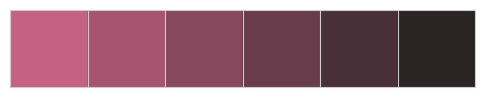

In [ ]:
delhi = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(delhi),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

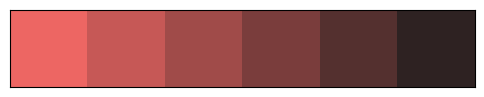

In [ ]:
chennai = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(chennai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

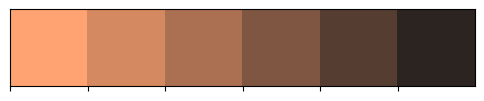

In [ ]:
hyderabad = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(hyderabad),size=1)

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Loading the dataset and displaying rows ⌛</strong></center></h3>
</div>

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Mumbai.csv")
df2 = pd.read_csv("/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Delhi.csv")
df3 = pd.read_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Chennai.csv')
df4 = pd.read_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Hyderabad.csv')

In [ ]:
df1.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
df2.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


<div class="alert alert-warning">
<p>📌 Since for a set of houses, nothing was mentioned about certain amenities, '9' was used to mark such values, which could indicate the absence of information about the apartment but these values don't ascertain the absence of such a feature in real life.<br><br>
We will be dropping these values so that they don't cloud our analysis.
</p>
</div>

In [ ]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)

In [ ]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Dataframe shape after dropping values</strong></center></h3>
</div>

In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)


(1398, 40)
(2002, 40)
(2233, 40)
(2434, 40)


In [ ]:
print(f"{y_}Data types of data columns: \n{m_}{df1.dtypes}")

Data types of data columns: 
Price                                        int64
Area                                         int64
Location                                    object
No. of Bedrooms                              int64
Resale                                       int64
MaintenanceStaff                           float64
Gymnasium                                  float64
SwimmingPool                               float64
LandscapedGardens                          float64
JoggingTrack                               float64
RainWaterHarvesting                        float64
IndoorGames                                float64
ShoppingMall                               float64
Intercom                                   float64
SportsFacility                             float64
ATM                                        float64
ClubHouse                                  float64
School                                     float64
24X7Security                               float64
Po

<div class="alert alert-warning">
<p>Modifying price to price in lakhs(INR)
</p>
</div>

In [ ]:
df1["Price     "]
df1.rename(columns = {'Price     ':'Price'}, inplace = True)

df1["Location                               "]
df1.rename(columns = {'Location                               ':'Location'}, inplace = True)


In [ ]:
df1['Price'] = df1['Price']/100000
df2['Price'] = df2['Price']/100000
df3['Price'] = df3['Price']/100000
df4['Price'] = df4['Price']/100000

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Feature generation: latitude and longitude 🌐</strong></center></h3>
</div>

In [ ]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

geolocator = Nominatim(user_agent="Ruch")

# Enhanced function to fetch geolocation data with error handling and caching
location_cache = {}  # Cache to store fetched locations

def fetch_geolocation(location_name):
    if location_name in location_cache:
        return location_cache[location_name]
    else:
        try:
            location = geolocator.geocode(location_name, timeout=10)  # Increase timeout for reliability
            if location:
                lat_lon = (location.latitude, location.longitude)
                location_cache[location_name] = lat_lon  # Cache the result
                return lat_lon
            else:
                return "NA", "NA"
        except Exception as e:
            print(f"Error fetching location for {location_name}: {e}")
            return "NA", "NA"

def feature_generation(df):
    lat = []
    long = []
    a = 0
    for i in df['Location'].unique():  # Process unique locations only to minimize API calls
        latitude, longitude = fetch_geolocation(i)
        lat.append(latitude)
        long.append(longitude)
        print(a, i, latitude, longitude)
        a += 1
        time.sleep(1)  # Sleep to avoid hitting API rate limits

    # Map the cached latitudes and longitudes back to the dataframe
    df['Latitude'] = df['Location'].map(location_cache).apply(lambda x: x[0] if isinstance(x, tuple) and x[0] != "NA" else "NA")
    df['Longitude'] = df['Location'].map(location_cache).apply(lambda x: x[1] if isinstance(x, tuple) and x[1] != "NA" else "NA")
    return df

In [ ]:
feature_generation(df1)

In [ ]:
feature_generation(df2)

0 Sector 10 Dwarka 28.5843113 77.05769328545757
1 Uttam Nagar 28.6215226 77.0611064
2 Sarita Vihar 28.52863025 77.28835901957537
3 Dwarka Mor 28.61931 77.0332792
4 Sector 7 Dwarka 28.5874118 77.0673052
5 Sector 6 Dwarka 28.5925436 77.06467187079608
6 Sector 5 Dwarka 28.59740795 77.05669444035006
7 Sector 23 Rohini 28.72122875 77.08000848524587
8 Mayur Vihar II 28.6185287 77.3026578
9 Sector 24 Rohini 28.728312000000003 77.08789004959439
10 Sector 11 Dwarka 28.58955135 77.04999825784071
11 Sector 23 Dwarka 28.5619923 77.0491008
12 Sector 12 Dwarka 28.5956058 77.04303844386249
13 West End 55.9496995 -3.2134694
14 Sector 9 Rohini 28.7148859 77.12358281294891
15 Mundka 28.6824341 77.0305741
16 Sector 13 Rohini 28.7224501 77.13217323821597
17 Jamia Nagar 28.5687308 77.2848272
18 Sector 19 Dwarka 28.5757718 77.04871203974312
19 Sector 17 Dwarka 28.592318499999998 77.02861513501492
20 Bindapur 25.031423 83.0252066
21 Sector-18 Dwarka 28.587092900000002 77.03582770745707
22 Vasant Kunj 28.5292

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
0,105.0,1200,Sector 10 Dwarka,2,1,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.584311,77.057693
1,60.0,1000,Uttam Nagar,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.621523,77.061106
2,150.0,1350,Sarita Vihar,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.52863,77.288359
3,25.0,435,Uttam Nagar,2,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.621523,77.061106
4,58.0,900,Dwarka Mor,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.61931,77.033279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,90.0,1200,Paschim Vihar,2,1,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.669578,77.095956
1998,120.0,1350,Pitampura,3,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.699512,77.130105
1999,160.0,1963,DLF Phase 5,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.503445,77.095205
2000,116.0,1050,Jasola,2,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.542735,77.291334


In [ ]:
feature_generation(df3)

0 Perungalathur 12.9145454 80.0879549
1 Madhavaram 13.1429313 80.2325166
2 Karapakkam 12.9117073 80.2277203
3 Thiruvidandhai NA NA
4 Iyappanthangal NA NA
5 Mevalurkuppam 13.0280202 80.007207
6 Kolapakkam 12.8719136 80.1049737
7 Kundrathur 12.9957704 80.0973114
8 Pammal 12.9737938 80.1408
9 Puzhal 13.1636492 80.2038067
10 Selaiyur 12.9187445 80.1311172
11 Thoraipakkam OMR 12.9300691 80.2300221
12 Anna Nagar 13.0872004 80.2164421
13 Mogappair 13.0835142 80.1840779
14 Sholinganallur 12.9174426 80.21649018230858
15 Medavakkam 12.9229928 80.1882897
16 Avadi 13.1194809 80.1026704
17 Tiruvottiyur 13.1563873 80.3005279
18 Manapakkam 13.0147531 80.1744935
19 Madipakkam 12.9611348 80.2001292
20 Thiruvanmiyur 12.9858948 80.2644215
21 Ramapuram 14.2012997 78.77085116013691
22 Saidapet 13.020817 80.2239536
23 Poonamallee 13.0768552 80.05106225488868
24 Pallavaram 12.989815700000001 80.10098654184341
25 Maraimalai Nagar 12.7958223 80.0269097
26 Madambakkam 12.9057186 80.1543859
27 Perungudi 12.97102

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
0,55.00,1310,Perungalathur,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.914545,80.087955
1,53.50,1126,Madhavaram,2,0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.142931,80.232517
2,82.05,1307,Karapakkam,3,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.911707,80.22772
3,234.00,3600,Thiruvidandhai,3,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,NA
4,101.00,1700,Iyappanthangal,3,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,39.24,872,Ambattur,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.119375,80.150765
2229,266.00,1540,Anna Nagar,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0872,80.216442
2230,110.00,1200,Kotturpuram,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.01937,80.243551
2231,248.00,1375,Anna Nagar,3,0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0872,80.216442


In [ ]:
feature_generation(df4)

0 Nizampet 17.515397 78.3817156
1 Hitech City 17.4698143 78.3853779
2 Manikonda 17.4037073 78.3766148
3 Alwal 17.5022292 78.5088584
4 Kukatpally 17.4930841 78.4054408
5 Gachibowli 17.4436222 78.3519638
6 Tellapur 17.4535469 78.2905401
7 Kokapet 17.3948624 78.3365214
8 Hyder Nagar 17.5036299 78.3864025
9 Mehdipatnam 17.3942627 78.4342514
10 Narsingi 21.3679273 78.4456015
11 Khajaguda Nanakramguda Road NA NA
12 Madhapur 17.4408924 78.3916304
13 Puppalaguda 17.39999505 78.3861689281263
14 Begumpet 17.446195 78.463016
15 Banjara Hills 17.4177464 78.4399014
16 AS Rao Nagar 17.4798689 78.5509653
17 Pragathi Nagar Kukatpally 17.4914595 78.4083792
18 Miyapur 17.4981608 78.3567628
19 Mallampet 18.9898611 79.7955465
20 Nanakramguda 17.4129831 78.338635
21 Attapur 17.3847673 77.9793799
22 West Marredpally 17.45121 78.5020964
23 Kompally 17.5401462 78.4909369
24 Sri Nagar Colony 17.3768805 78.5117854
25 Hakimpet 17.54970955 78.52413306848177
26 Pocharam 18.1417532 79.677583
27 Nagole 17.3775306 78

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
0,69.68,1340,Nizampet,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.515397,78.381716
1,290.00,3498,Hitech City,4,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.469814,78.385378
2,65.90,1318,Manikonda,2,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.403707,78.376615
3,57.39,1295,Alwal,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.502229,78.508858
4,56.79,1145,Kukatpally,2,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.493084,78.405441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,45.00,1250,Kollur Road,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.848484,74.670878
2430,35.03,1001,Miyapur,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.498161,78.356763
2431,56.00,1551,chandrayangutta,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.324696,78.481356
2432,75.00,3000,Jubilee Hills,3,1,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.430836,78.410288


In [ ]:
df1.to_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Mumbai_updated.csv')
df2.to_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Delhi_updated.csv')
df3.to_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Chennai_updated.csv')
df4.to_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Hyderabad_updated.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Mumbai_updated.csv')
df2 = pd.read_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Delhi_updated.csv')
df3 = pd.read_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Chennai_updated.csv')
df4 = pd.read_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Hyderabad_updated.csv')


In [ ]:
df1.head(5)

,Unnamed: 0.1,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
0,0,0,48.5,720,Kharghar,1,1,1,0,0,...,1,0,0,0,0,0,0,0,19.05253,73.073511
1,1,1,45.0,600,Kharghar,1,1,1,1,1,...,1,0,0,0,0,0,0,0,19.05253,73.073511
2,2,2,67.0,650,Kharghar,1,1,1,1,1,...,1,0,0,0,0,0,0,0,19.05253,73.073511
3,3,3,45.0,650,Kharghar,1,1,1,0,0,...,1,0,0,0,0,0,1,0,19.05253,73.073511
4,4,4,50.0,665,Kharghar,1,1,1,0,0,...,1,0,0,0,0,0,0,0,19.05253,73.073511


In [ ]:
df2.head(5)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
0,0,105.0,1200,Sector 10 Dwarka,2,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.584311,77.057693
1,1,60.0,1000,Uttam Nagar,3,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.621523,77.061106
2,2,150.0,1350,Sarita Vihar,2,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.528630,77.288359
3,3,25.0,435,Uttam Nagar,2,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.621523,77.061106
4,4,58.0,900,Dwarka Mor,3,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.619310,77.033279


In [ ]:
df1 = df1.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
df2 = df2.drop(['Unnamed: 0'], axis = 1)
df3 = df3.drop(['Unnamed: 0'], axis = 1)
df4 = df4.drop(['Unnamed: 0'], axis = 1)

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>EDA 📊</strong></center></h3>
</div>

### Graphs

In [ ]:
sns.set_style("whitegrid")

In [ ]:
def triple_plot(y, title, color):
    fig, axes = plt.subplots(1, 3, figsize=(30, 35), sharey=True)
    sns.histplot(y=y, kde=True, color=color, ax=axes[0])
    axes[0].set_title('Histogram + KDE')
    sns.boxplot(y=y, color=color, ax=axes[1])
    axes[1].set_title('Boxplot')
    sns.violinplot(y=y, color=color, ax=axes[2])
    axes[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

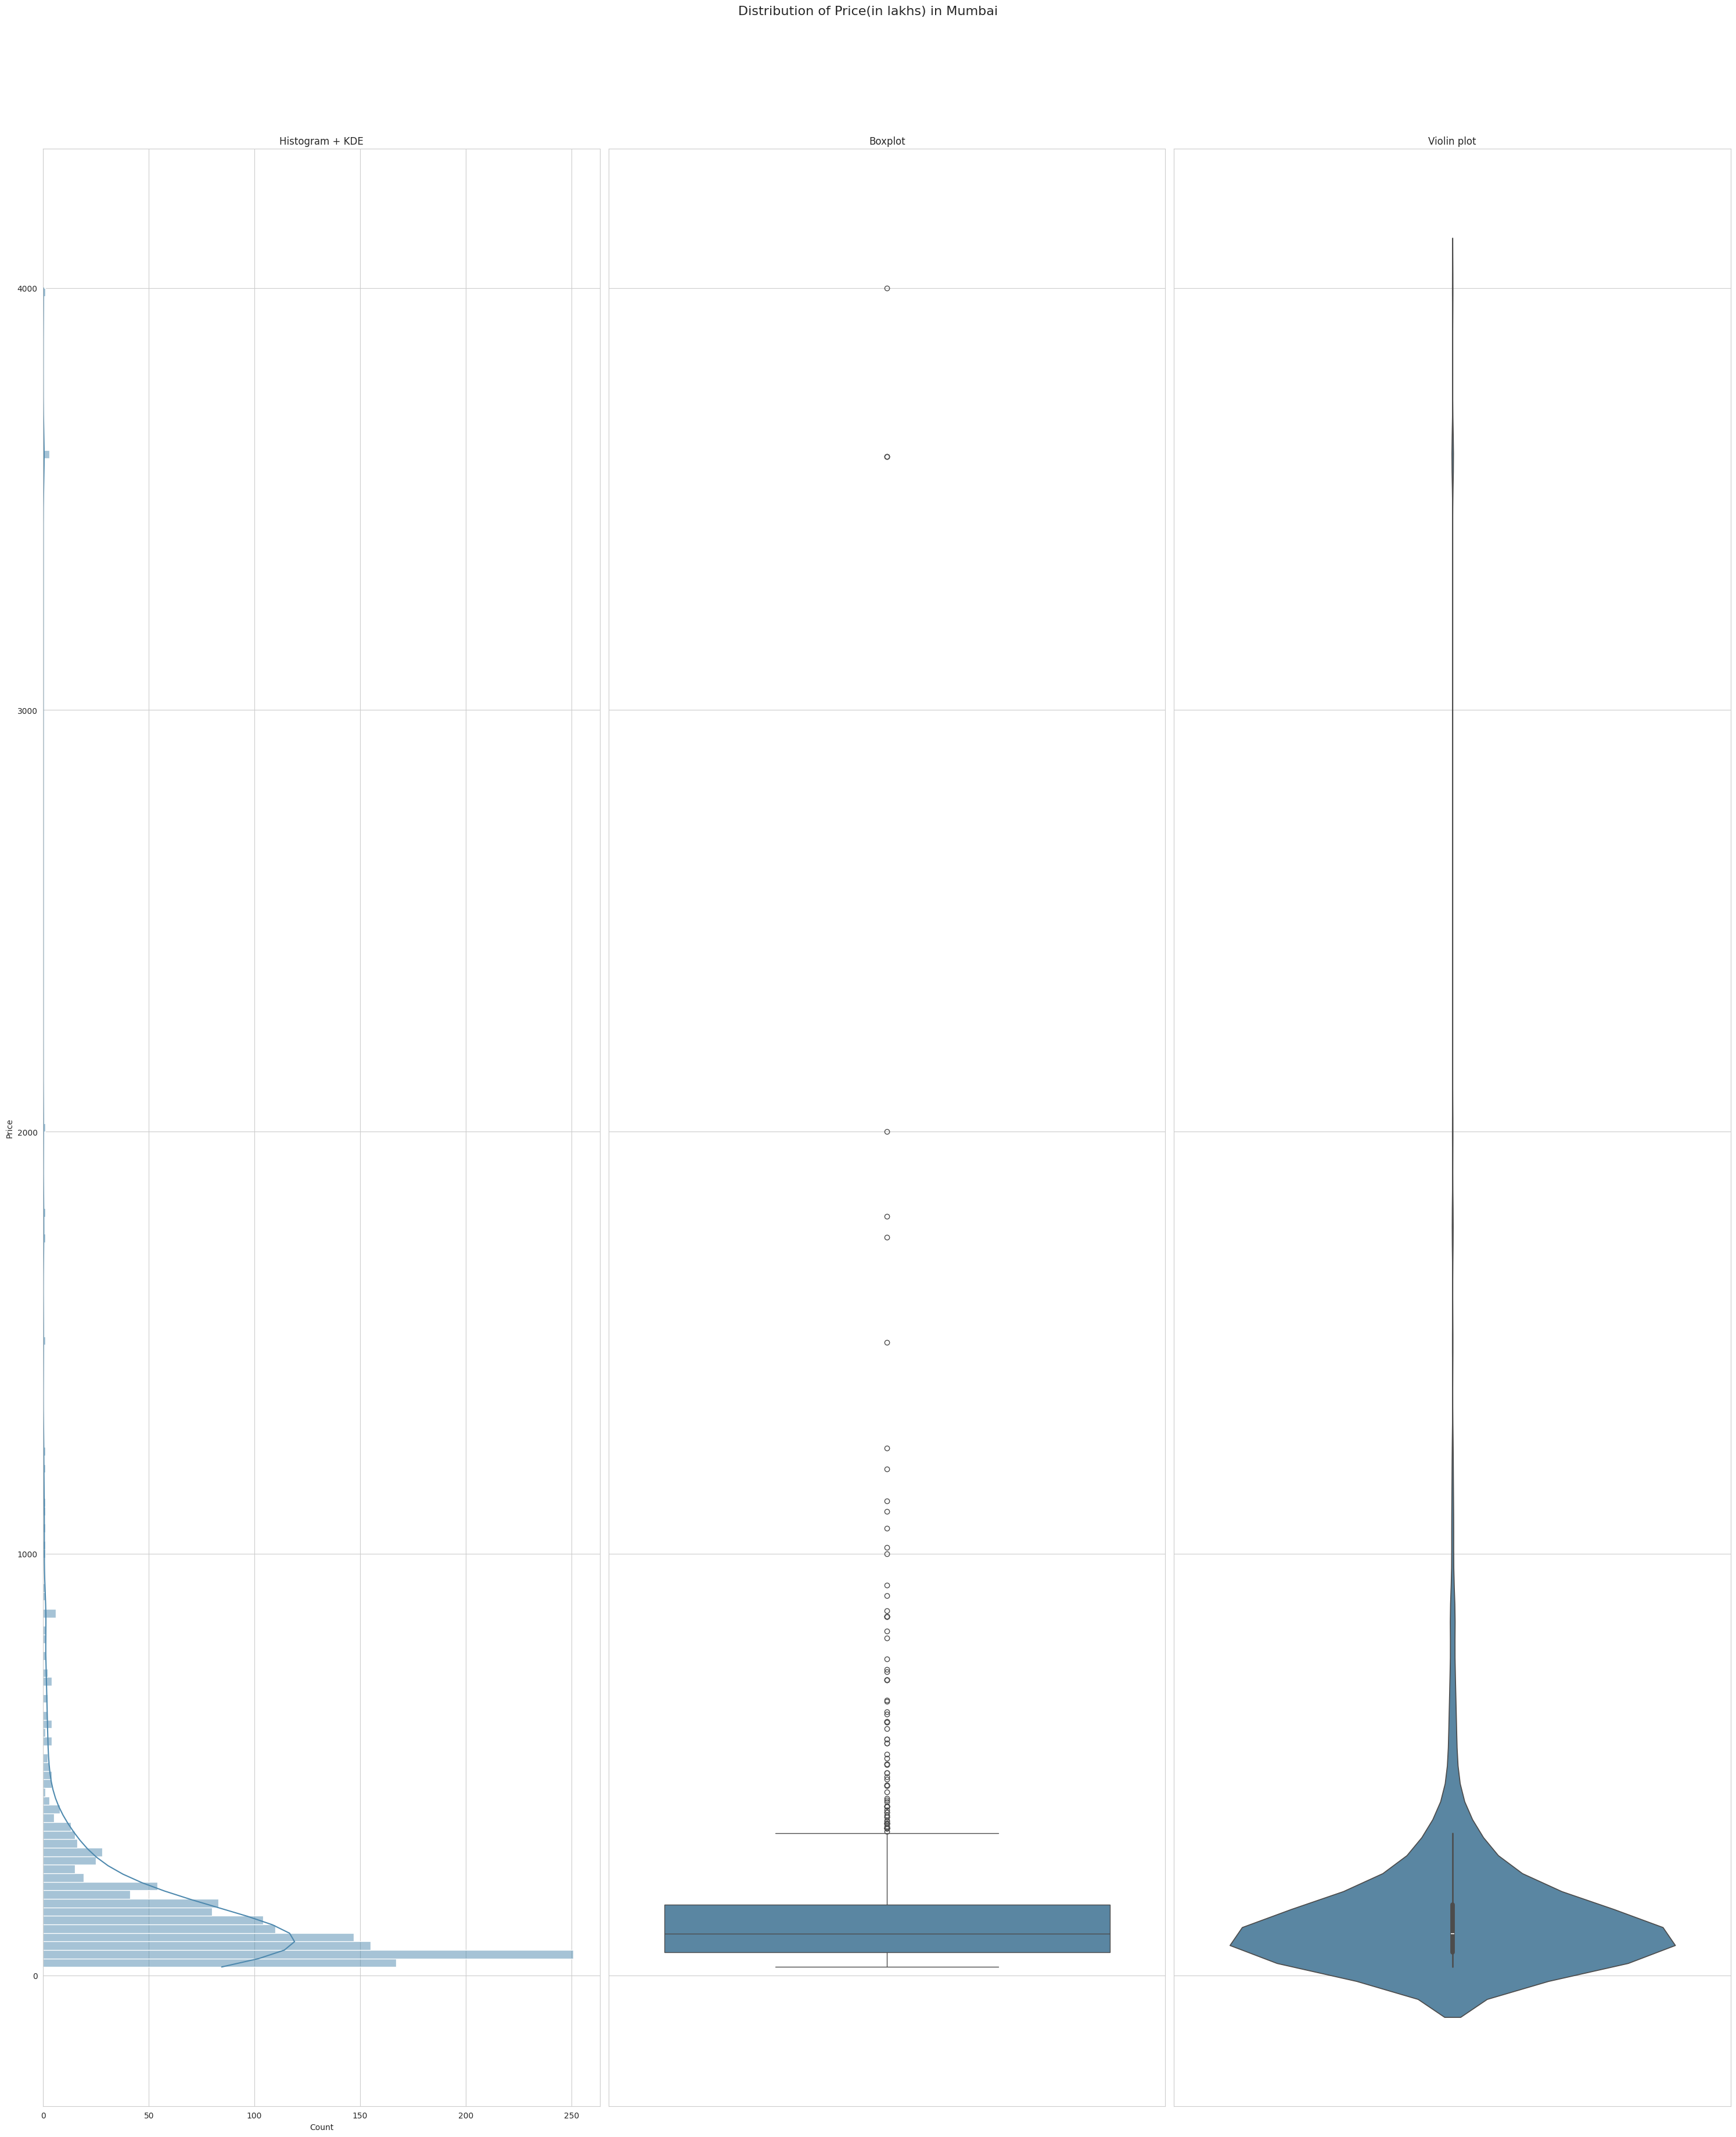

In [ ]:
triple_plot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai',custom_colors[0])

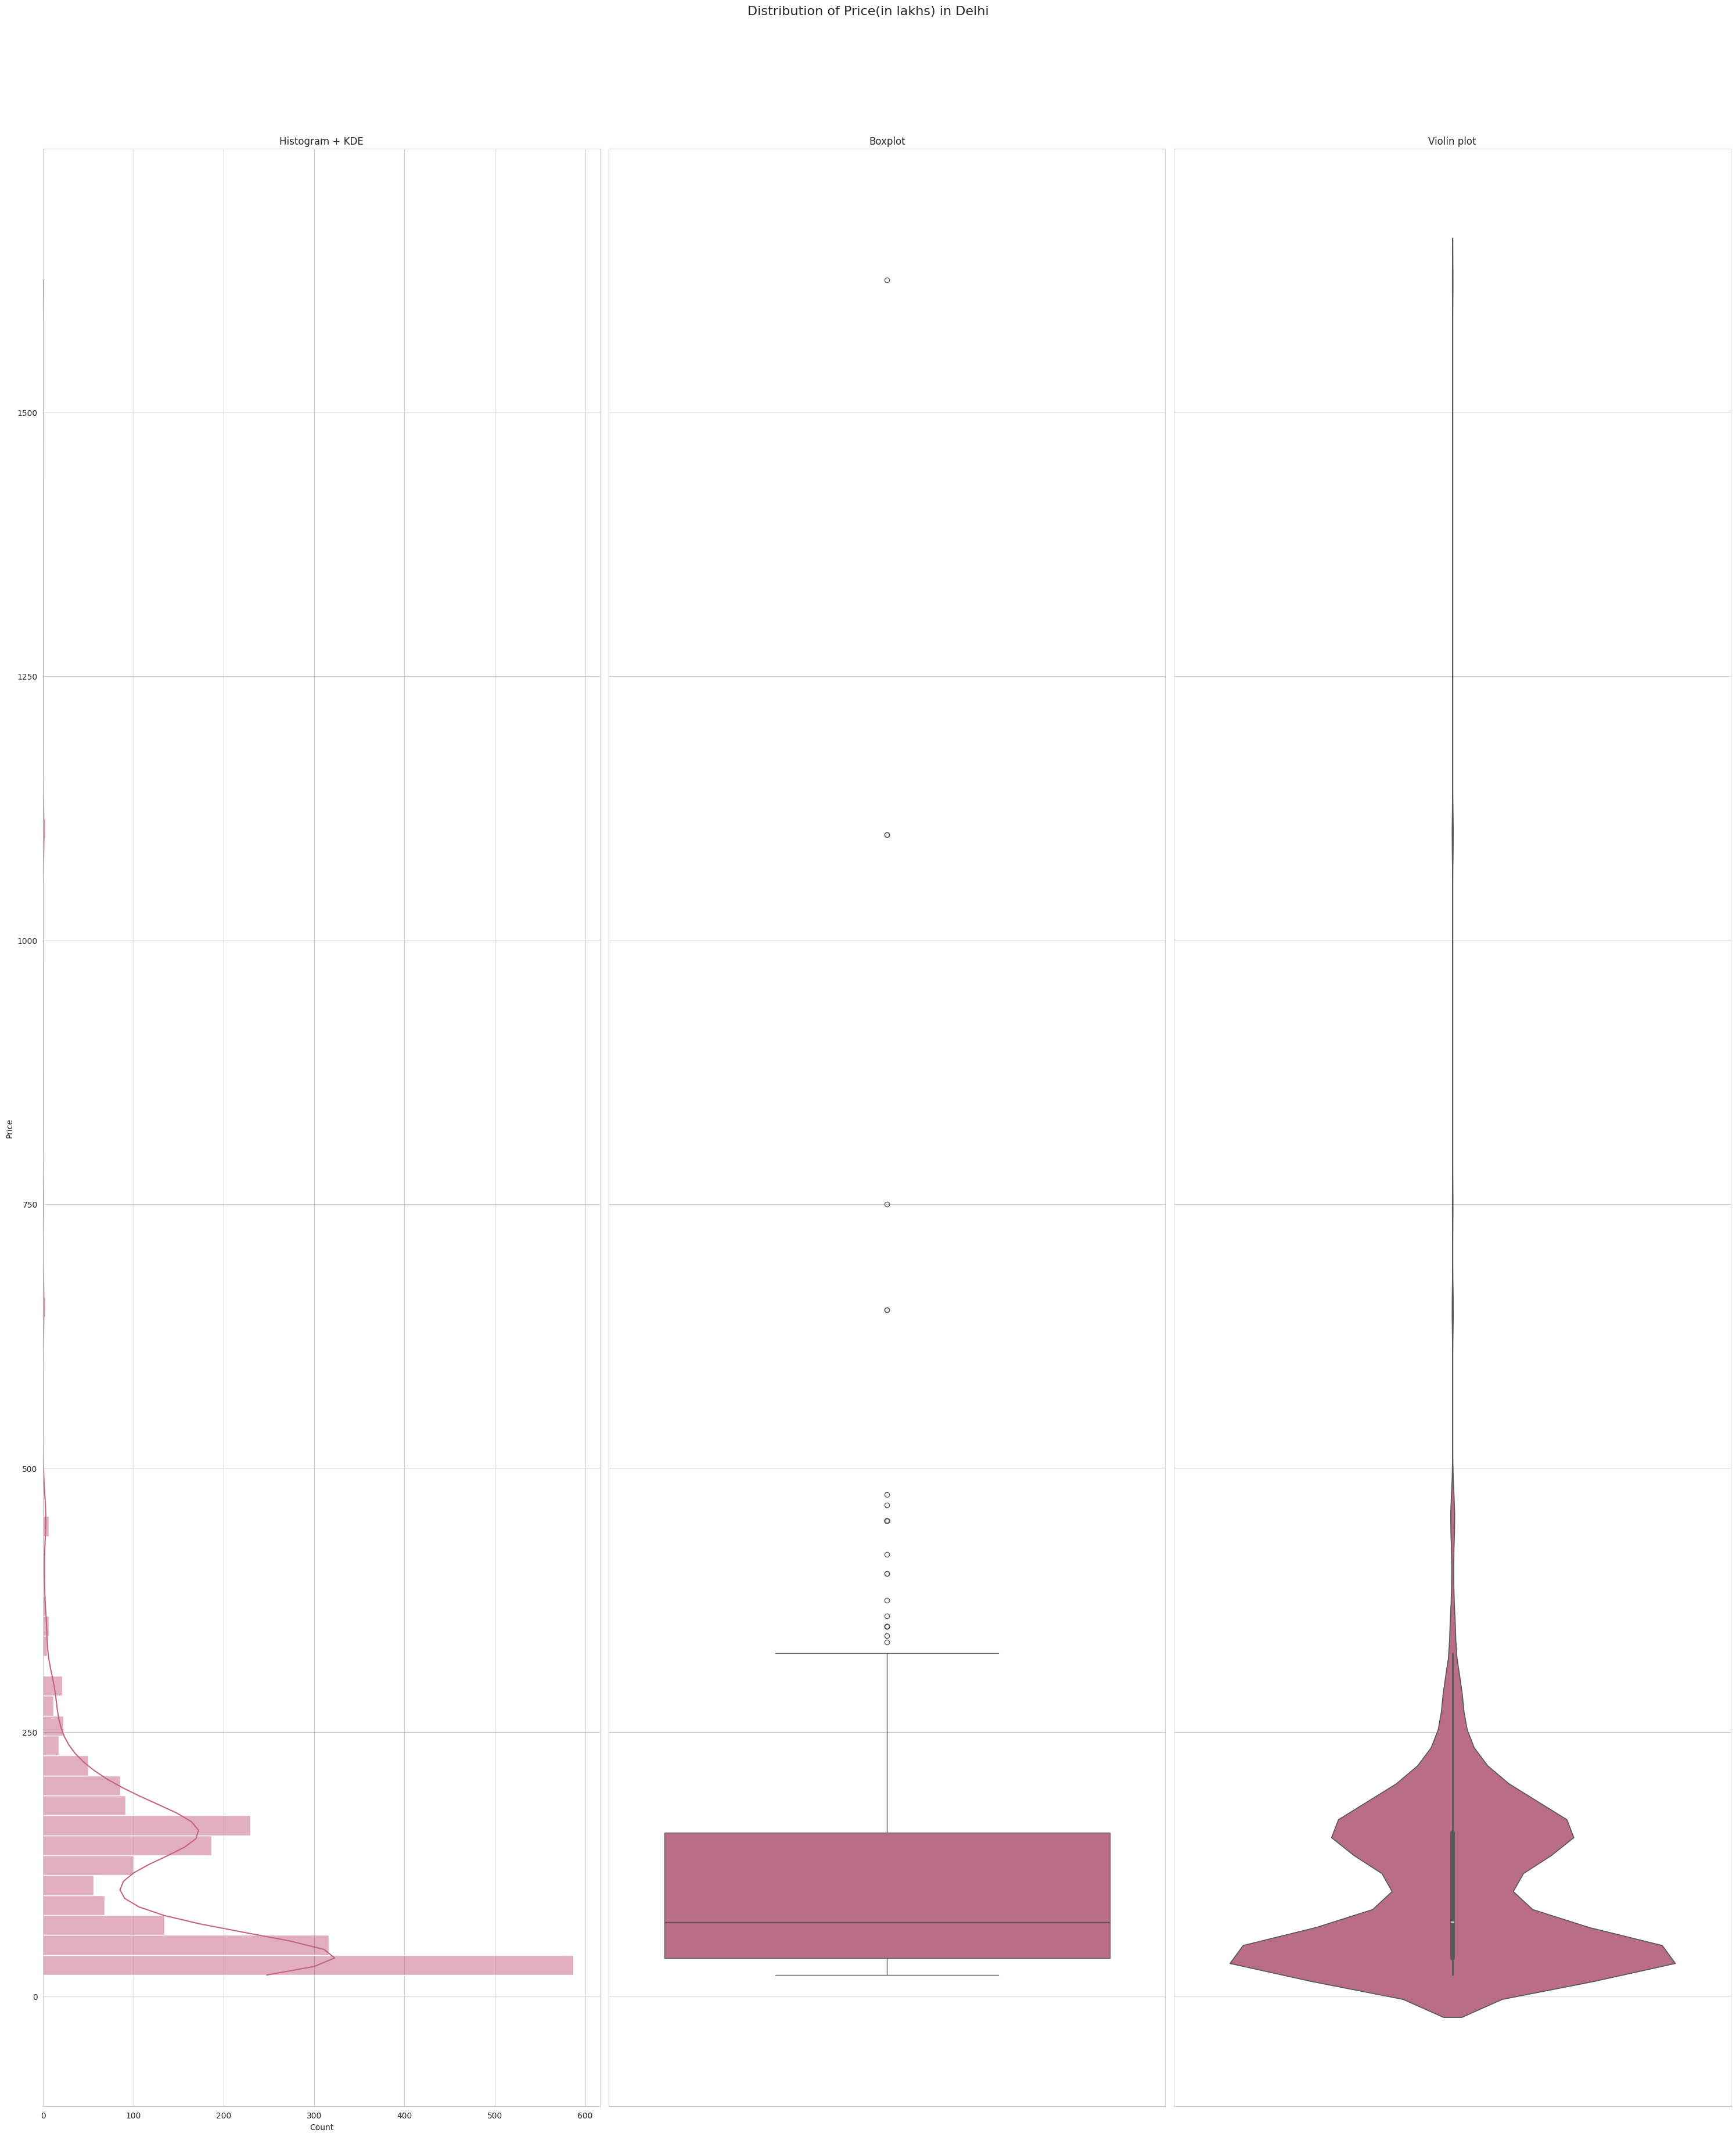

In [ ]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Delhi',custom_colors[1])

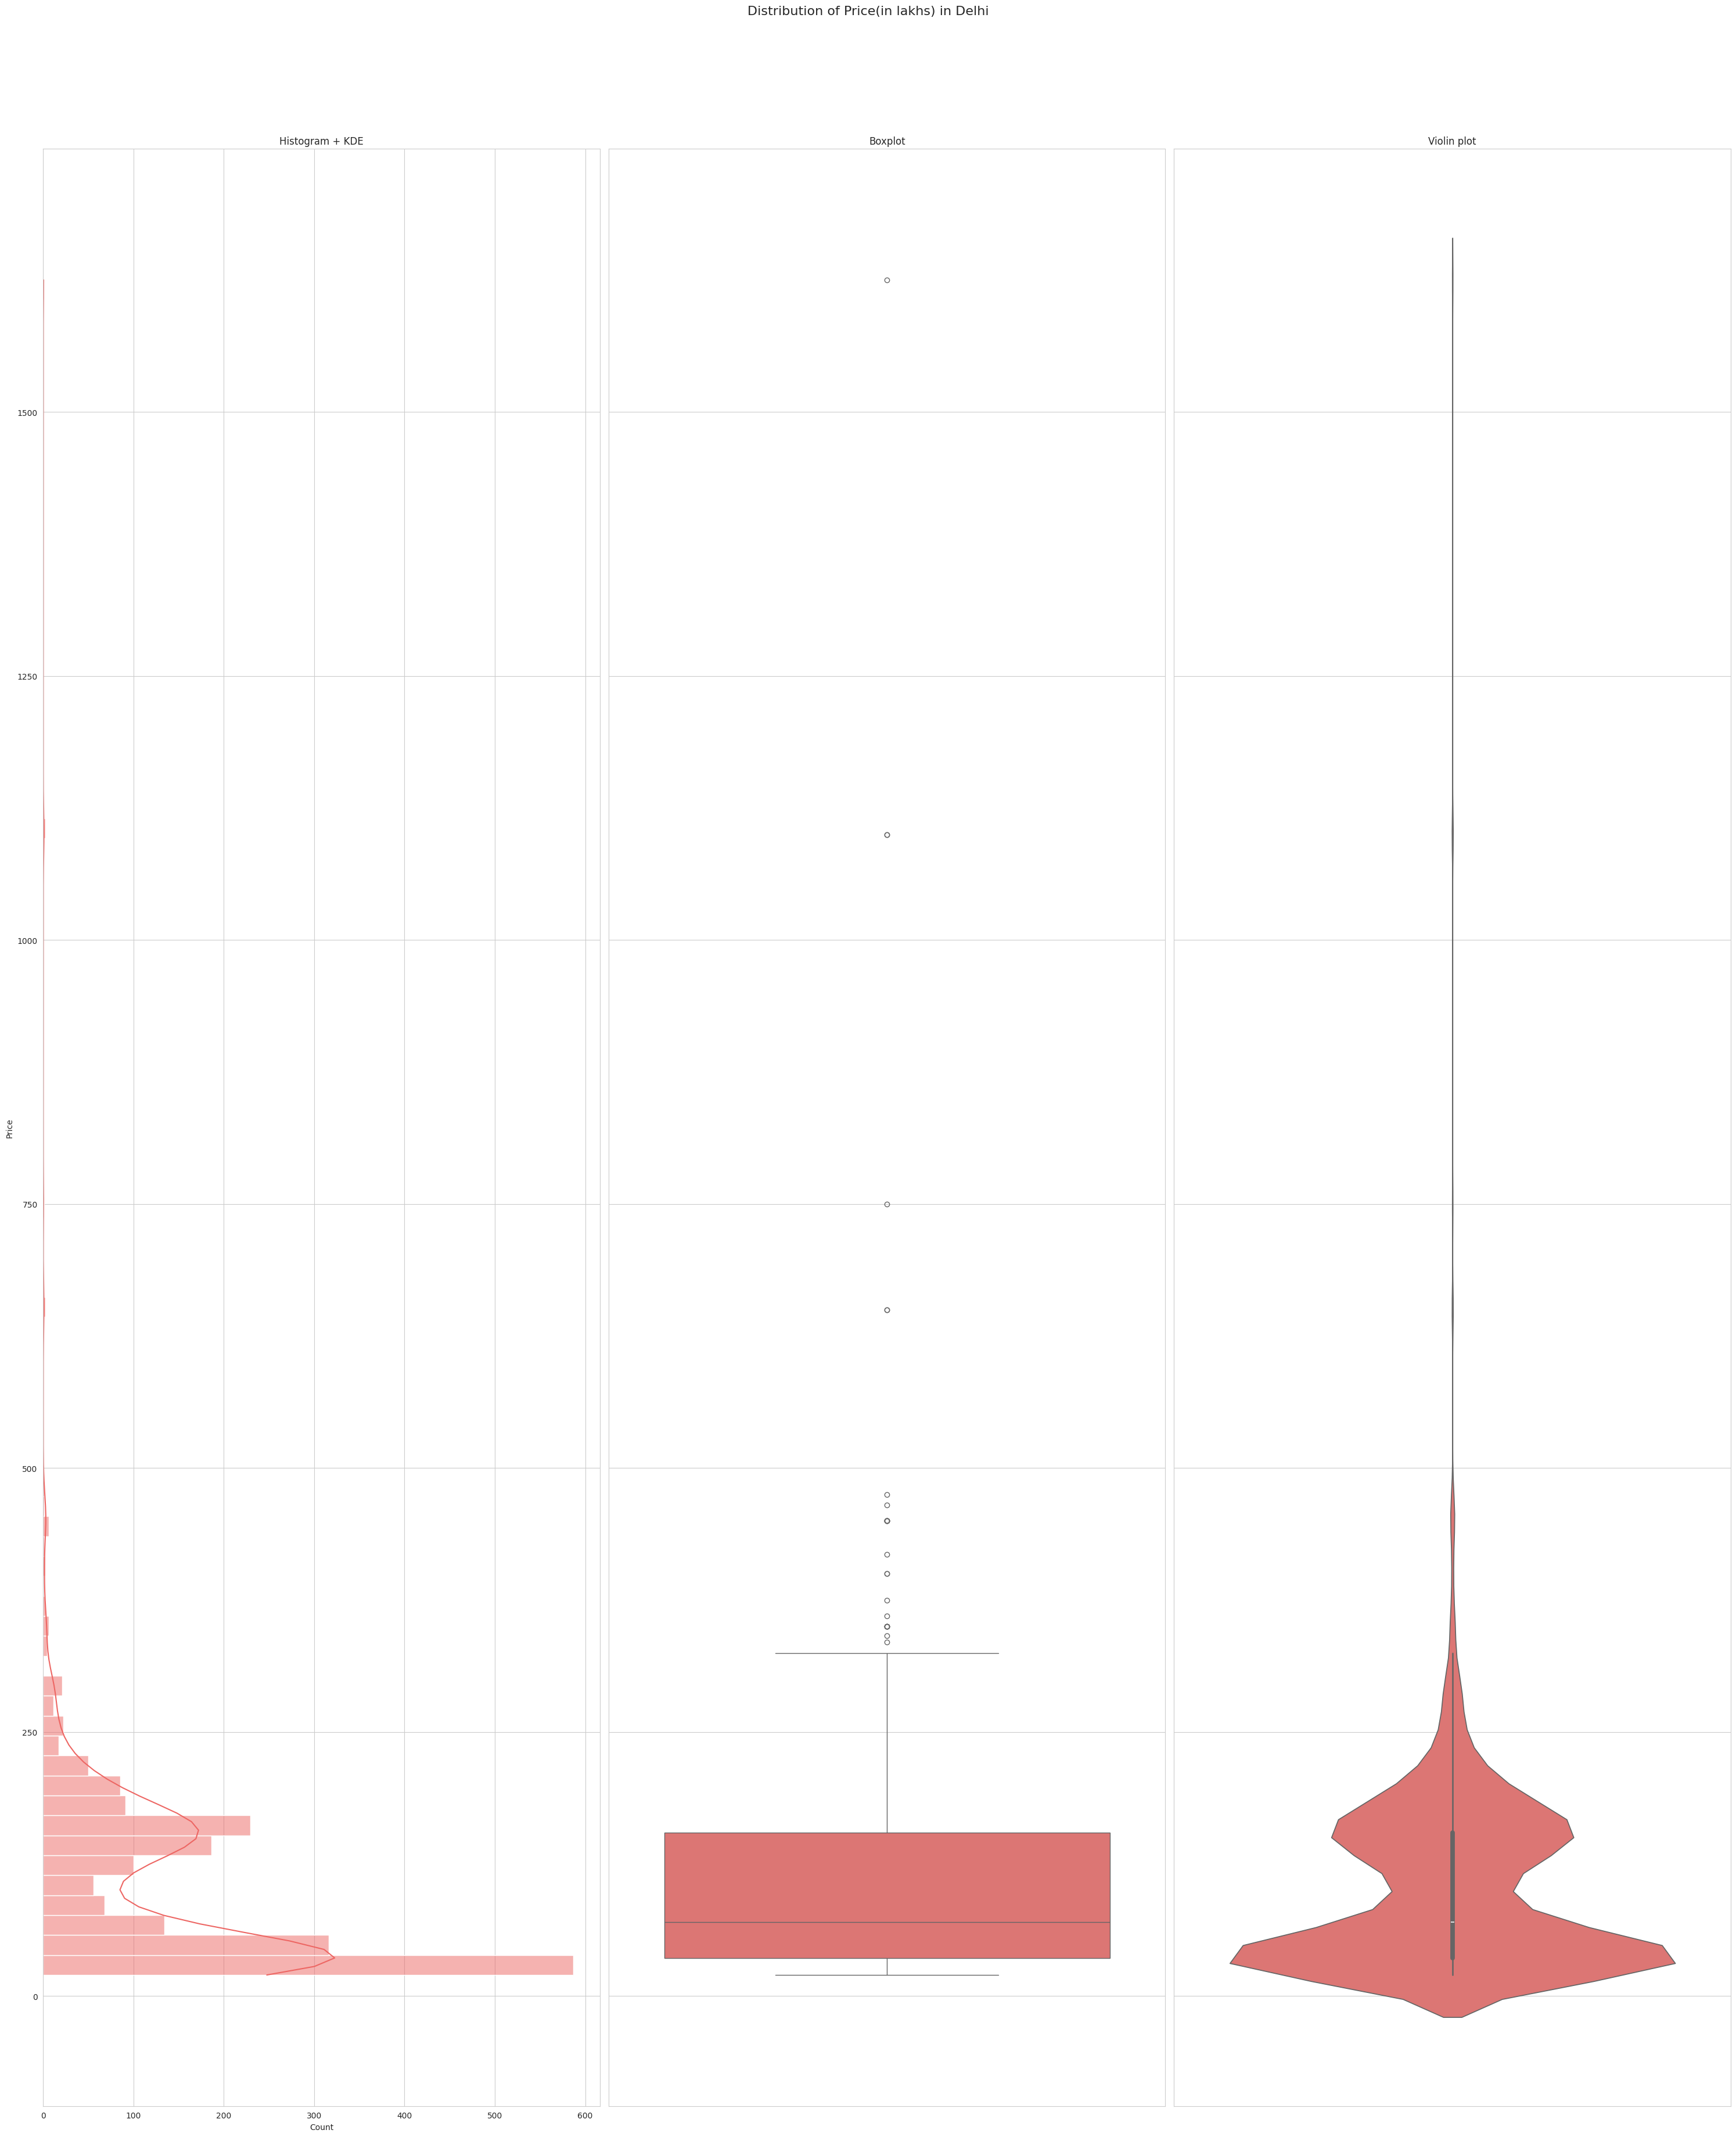

In [ ]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Delhi',custom_colors[2])

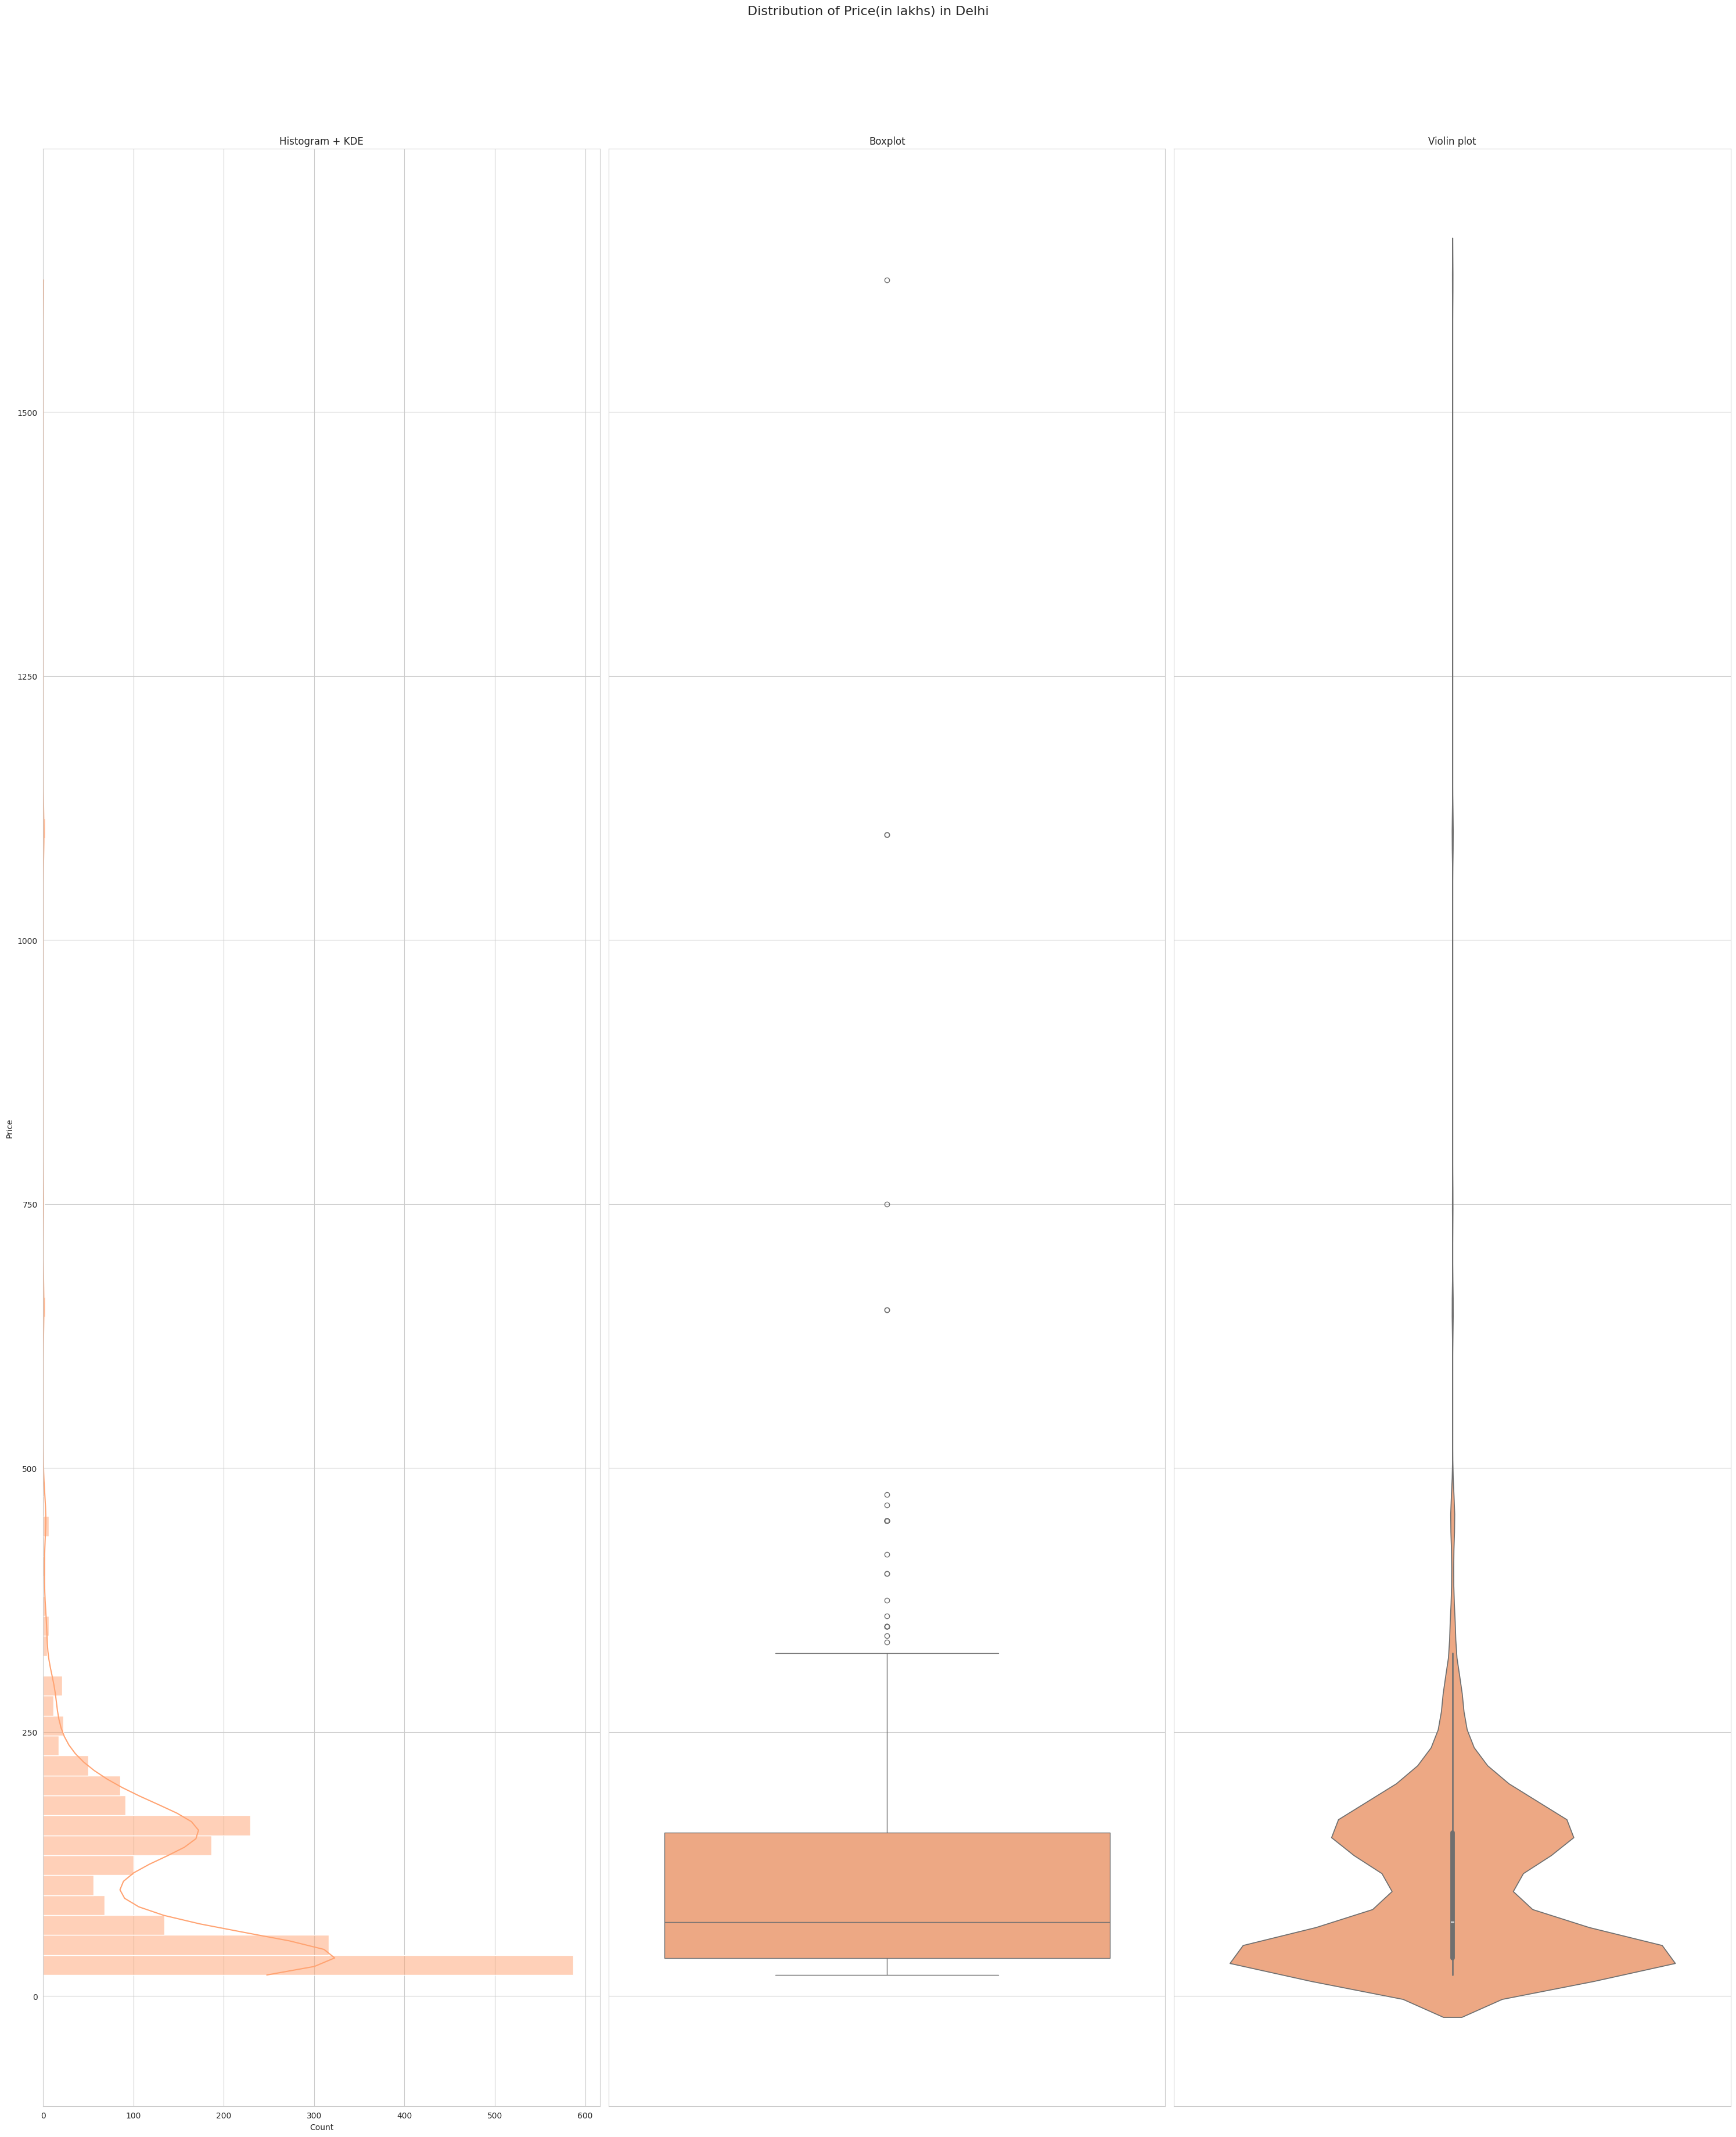

In [ ]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Delhi',custom_colors[3])

In [ ]:
def count_plot(data,title,p):
    df5=data[data['Resale']== 0]
    df6=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=df5, order=df5.Location.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df6, order=df6.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

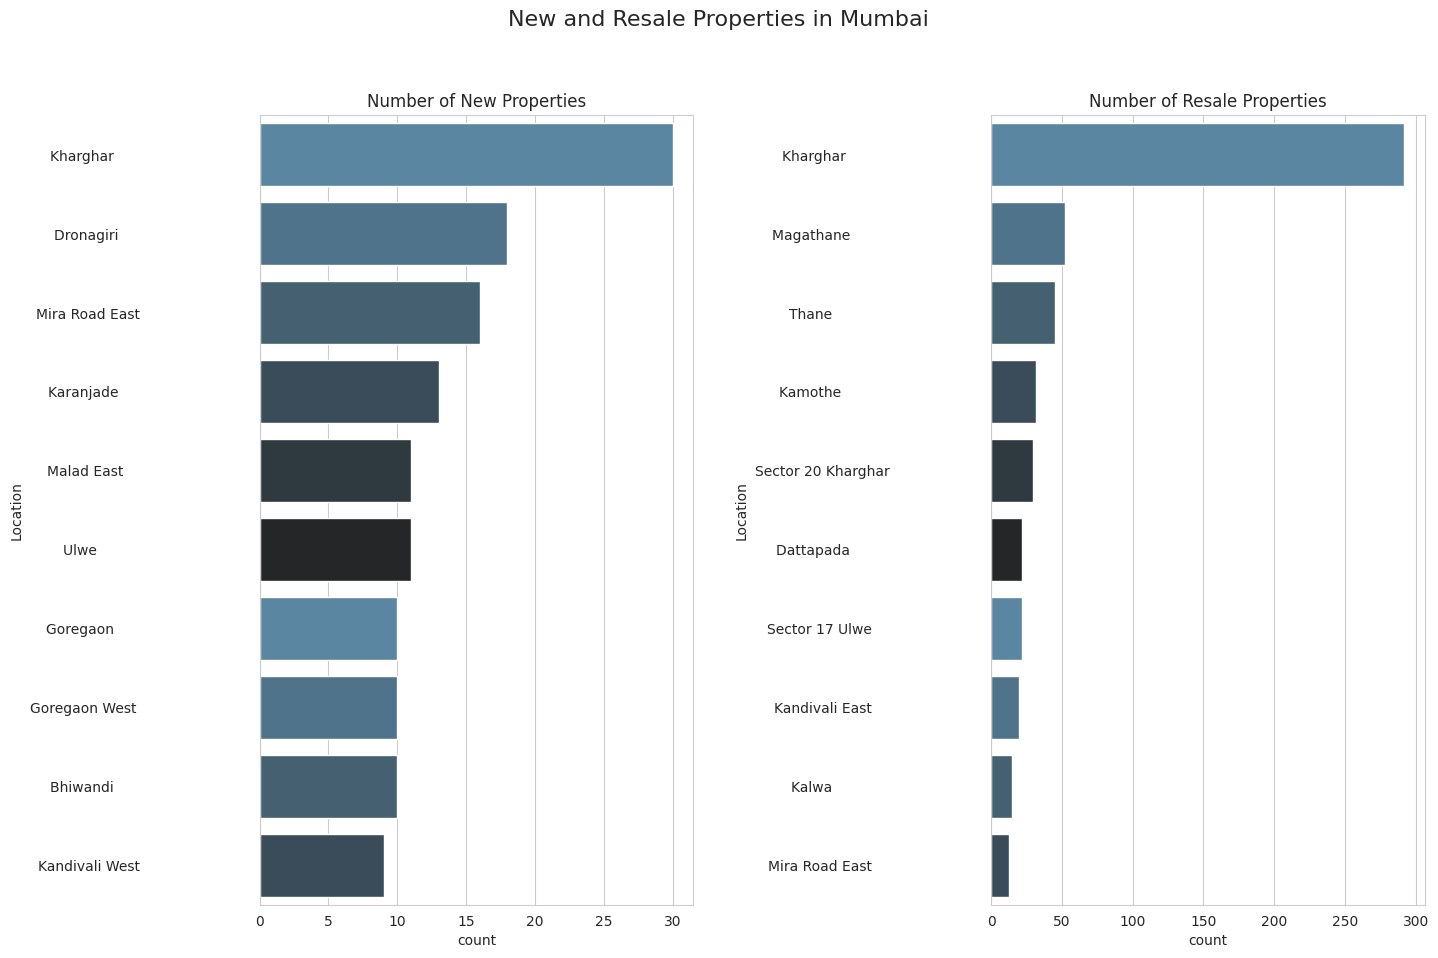

In [ ]:
count_plot(df1,'New and Resale Properties in Mumbai',mumbai)

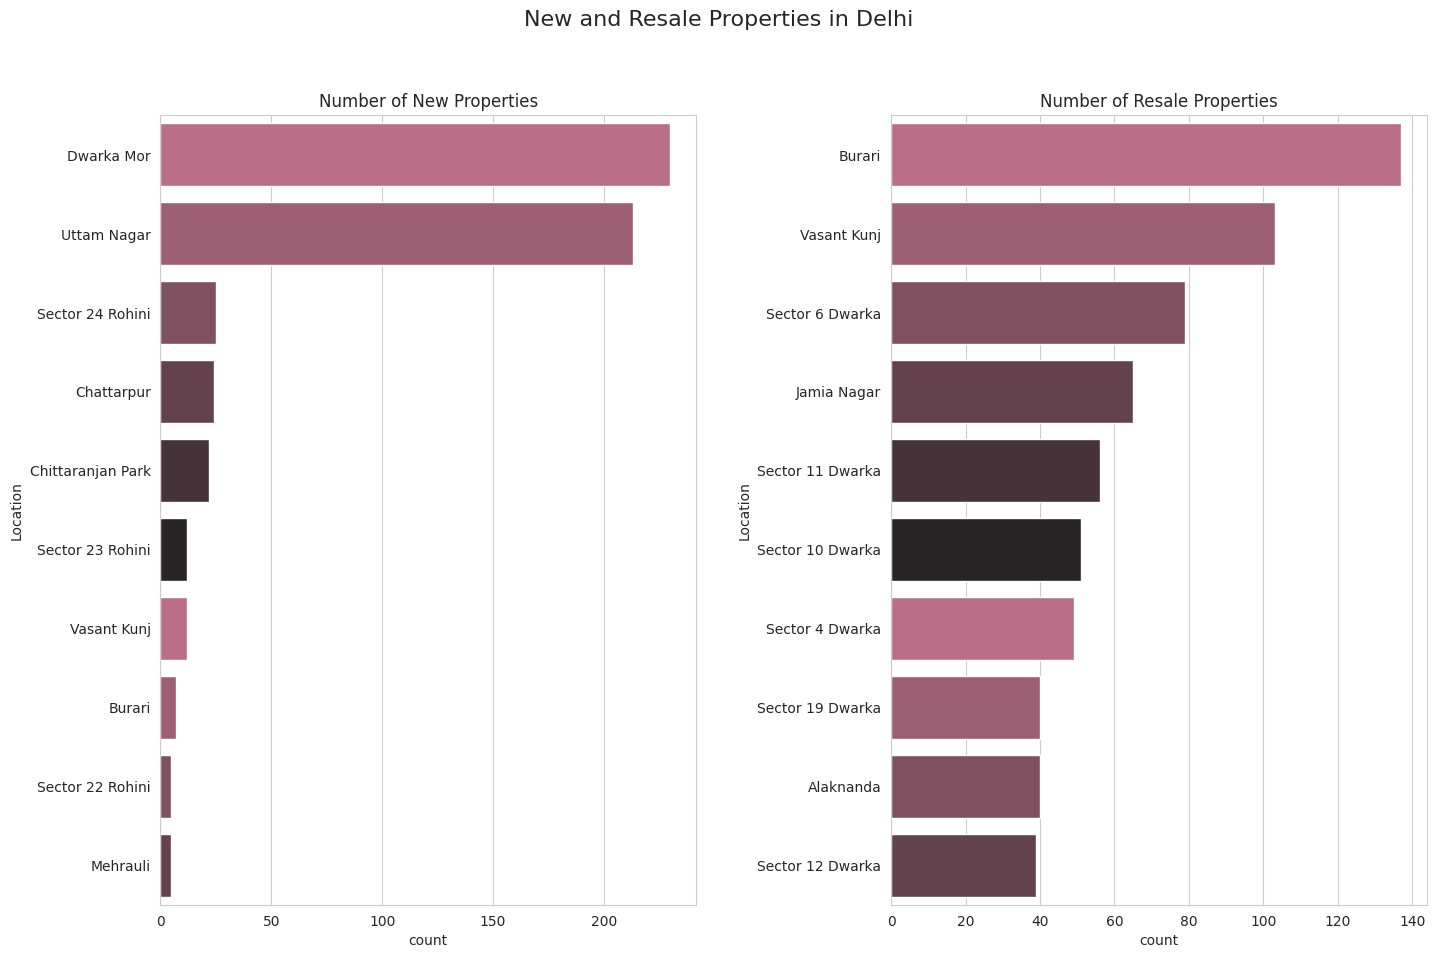

In [ ]:
count_plot(df2,'New and Resale Properties in Delhi',delhi)

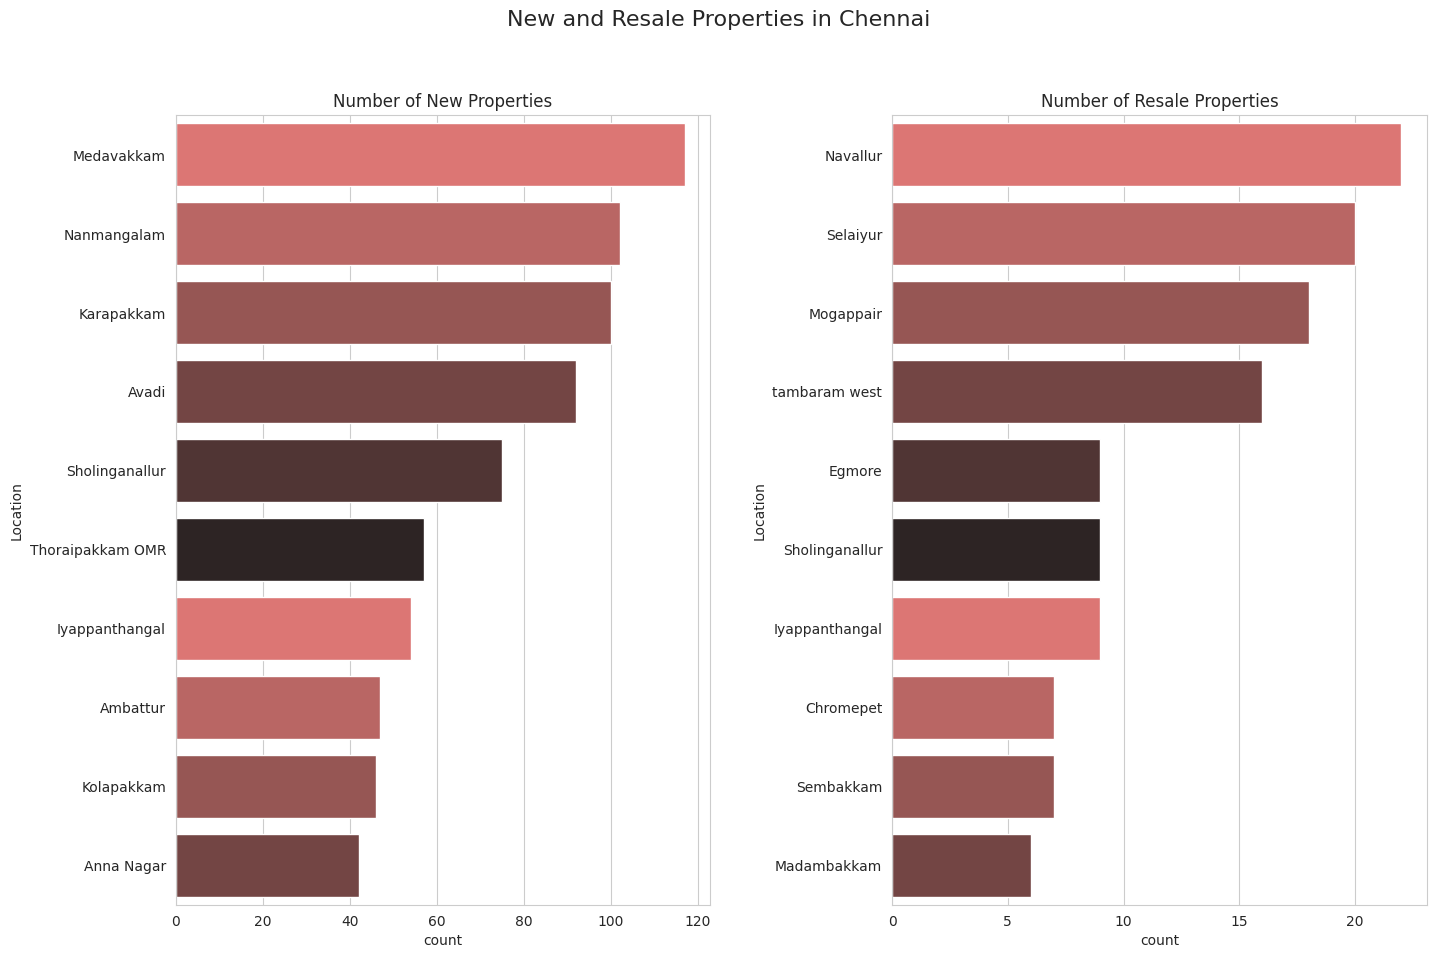

In [ ]:
count_plot(df3,'New and Resale Properties in Chennai',chennai)

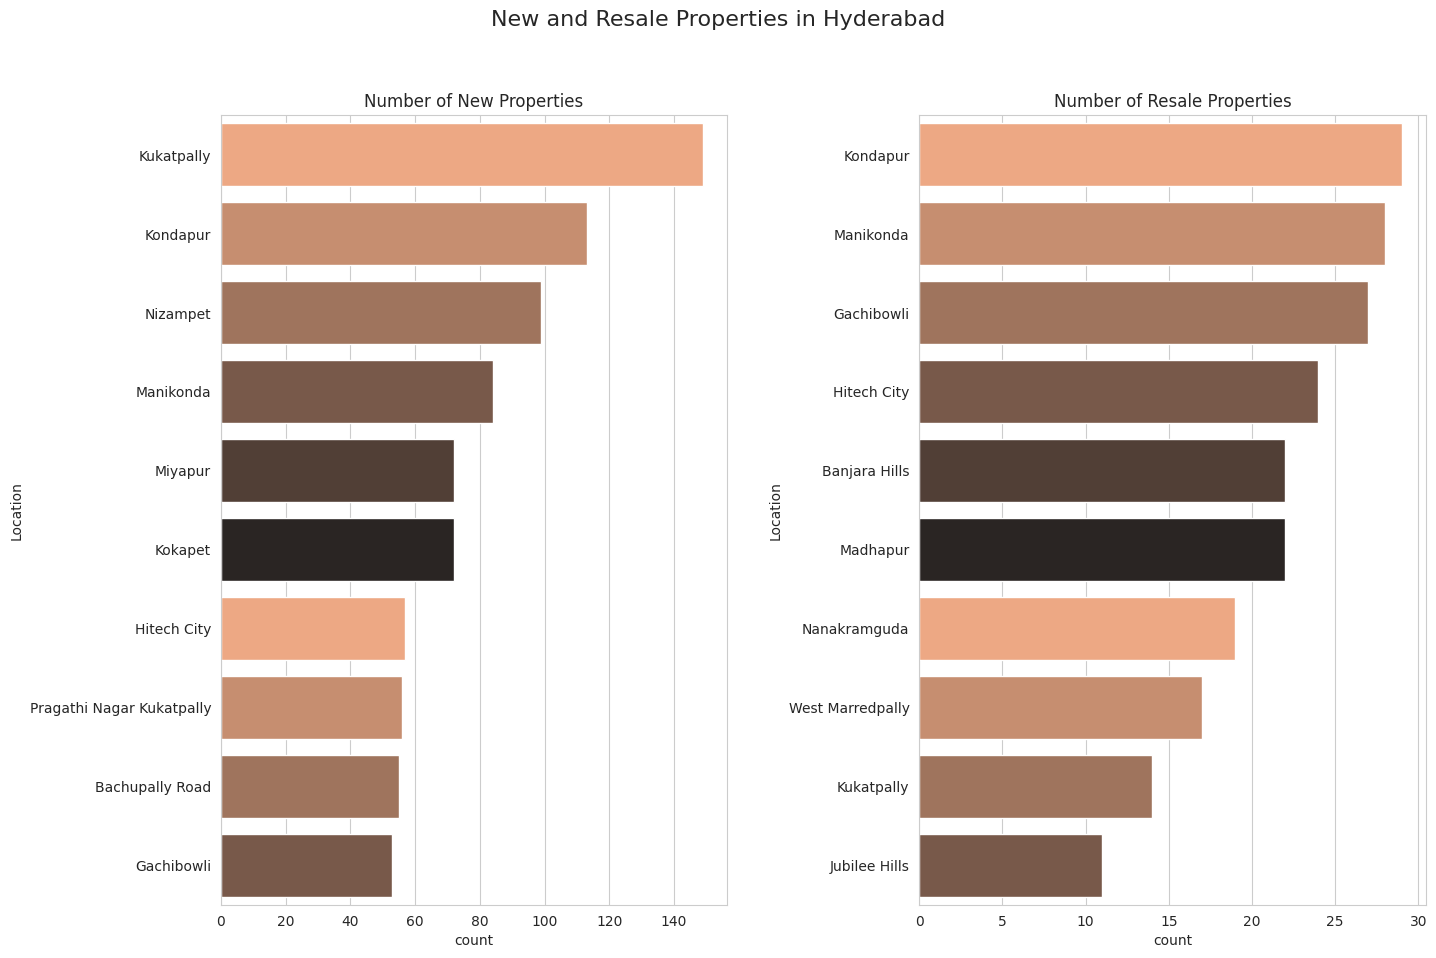

In [ ]:
count_plot(df4,'New and Resale Properties in Hyderabad',hyderabad)

In [ ]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

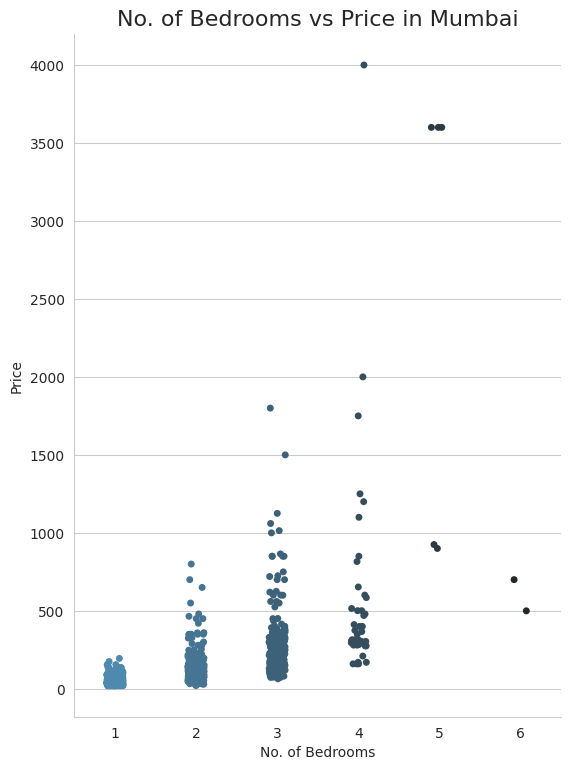

In [ ]:
cat_plot(df1,'Mumbai',mumbai)

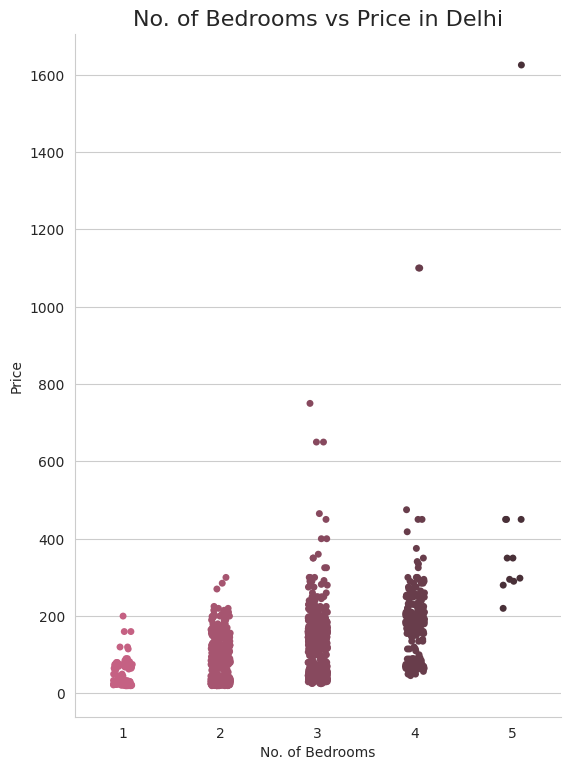

In [ ]:
cat_plot(df2,'Delhi',delhi)

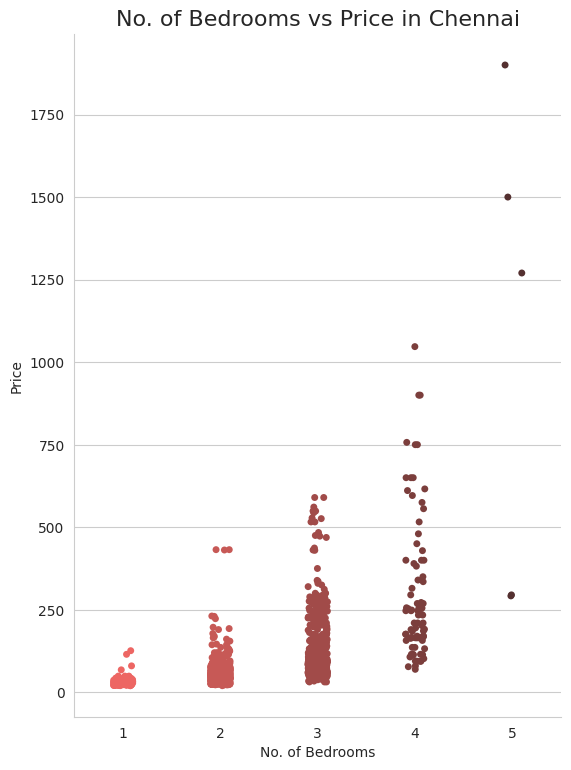

In [ ]:
cat_plot(df3,'Chennai',chennai)

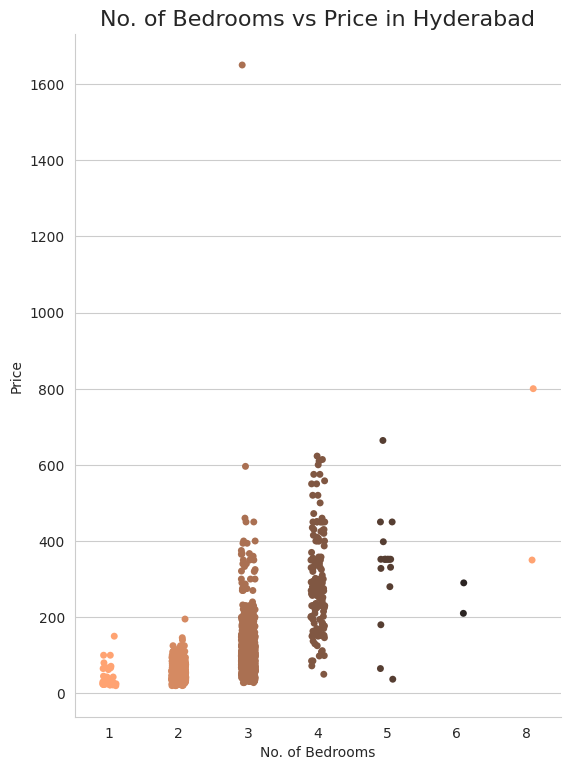

In [ ]:
cat_plot(df4,'Hyderabad',hyderabad)

In [ ]:
def scatter_plot(data,title,c):
    sns.scatterplot(x="Area", y="Price", data=data,color=c,marker="P")
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

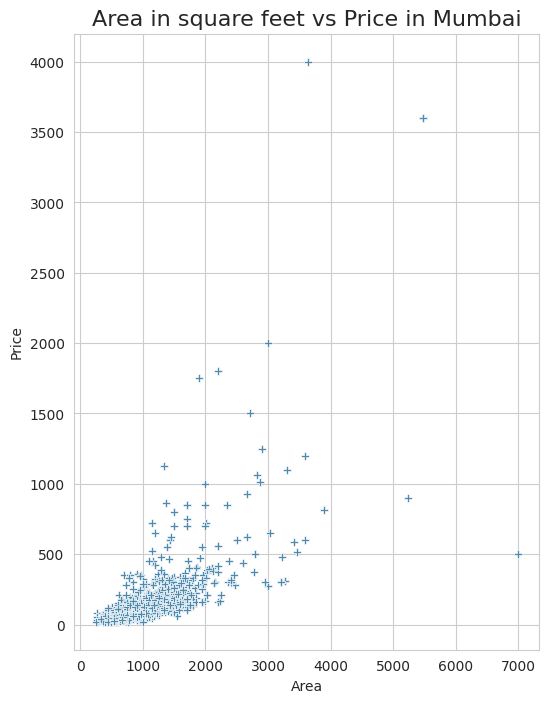

In [ ]:
scatter_plot(df1,'Mumbai',custom_colors[0])

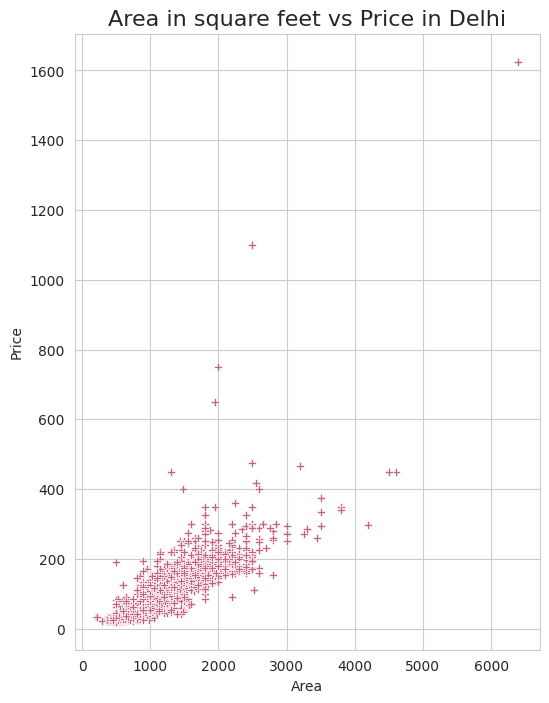

In [ ]:
scatter_plot(df2,'Delhi',custom_colors[1])

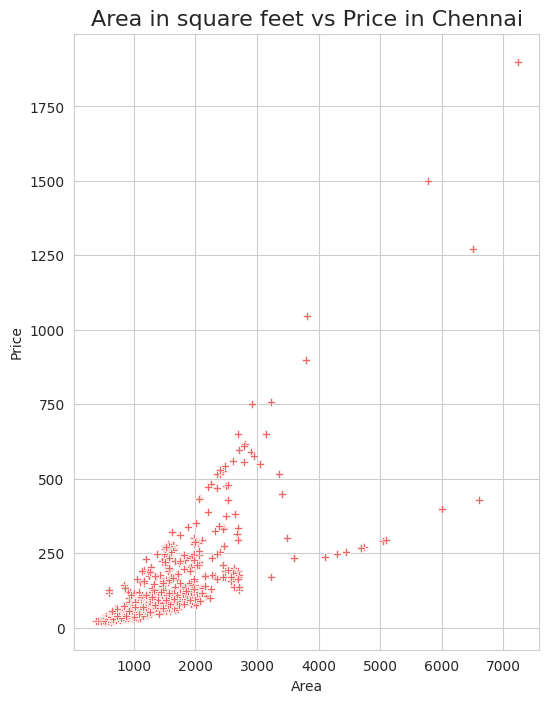

In [ ]:
scatter_plot(df3,'Chennai',custom_colors[2])

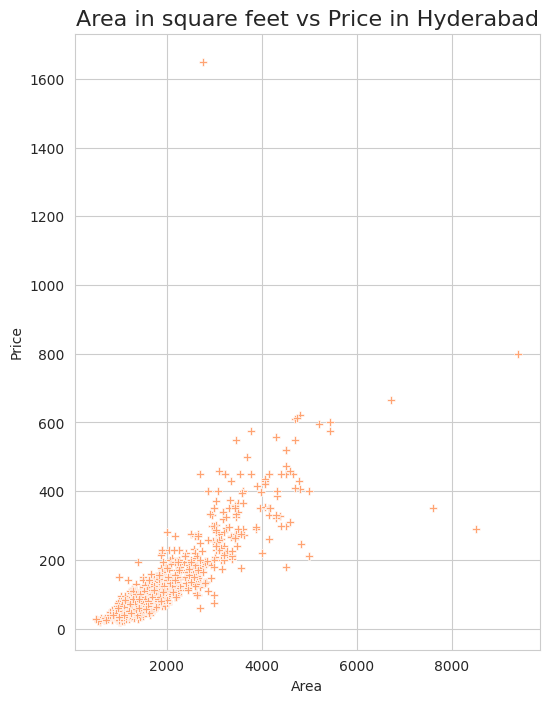

In [ ]:
scatter_plot(df4,'Hyderabad',custom_colors[3])

### Preprocess

In [ ]:
frames = [df1,df2, df3, df4]
#merged = pd.concat(frames, axis=0)
merged = pd.concat(frames, axis=0, ignore_index=True)
#merged = pd.get_dummies(merged, columns=['Location'])
merged = merged.loc[:, ~merged.columns.str.contains('^Unnamed')]

In [ ]:
# Renaming the columns to remove 'Location_' prefix
merged.columns = merged.columns.str.replace('Location_', '')

# Alternatively, if you want to be more precise and only remove 'Location_' from the beginning of the column names:
merged = merged.rename(columns=lambda x: x[9:] if x.startswith('Location_') else x)


In [ ]:
merged.columns

Index(['Price', 'Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting',
       ...
       'nizampet road', 'no 9                                   ',
       'raheja vihar                           ', 'raidurgam',
       'taloja panchanand                      ', 'tambaram west',
       'thakur village kandivali east          ',
       'ulhasnagar 4                           ',
       'vasant vihar thane west                ', 'west venkatapuram'],
      dtype='object', length=757)

In [ ]:
merged.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
0,48.5,720,Kharghar,1,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.05253,73.073511
1,45.0,600,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.05253,73.073511
2,67.0,650,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.05253,73.073511
3,45.0,650,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.05253,73.073511
4,50.0,665,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.05253,73.073511


In [ ]:
merged.to_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/merged.csv')

In [ ]:
#merged=merged['Latitude'].dropna()
#merged['Longitude'].dropna()
#merged=merged.Latitude.dropna()
#merged=merged['Longitude'].dropna()
#merged=merged['Longitude'].dropna()
merged.dropna(subset = ['Latitude', 'Longitude'], inplace=True)


In [ ]:
merged = merged[(merged['Latitude'] > 0) & (merged['Longitude'] > 0)]

In [ ]:
merged.to_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/merged.csv')

In [ ]:
merged.to_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/merged(withonehot).csv')

NameError: name 'merged' is not defined

In [ ]:
merged.isnull().sum()

Price                                      0
Area                                       0
No. of Bedrooms                            0
Resale                                     0
MaintenanceStaff                           0
                                          ..
tambaram west                              0
thakur village kandivali east              0
ulhasnagar 4                               0
vasant vihar thane west                    0
west venkatapuram                          0
Length: 757, dtype: int64

In [ ]:
df1.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
def preprocess(df) :
    df = df[['Location','Latitude','Longitude','Price']]
    df = df.replace('NA', np.nan)
    df.dropna(subset=['Latitude'], inplace=True)
    df.dropna(subset=['Price'], inplace=True)
    df["Latitude"] = df["Latitude"].astype(float)
    df["Longitude"] = df["Longitude"].astype(float)
    return df

In [ ]:
map1_df = preprocess(df1)
map2_df = preprocess(df2)
map3_df = preprocess(df3)
map4_df = preprocess(df4)

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Correlation</strong></center></h3>
</div>

In [ ]:
merged.columns
merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})


In [6]:
merged = pd.read_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/merged.csv')
merged_1hot=pd.read_csv('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/merged(withonehot).csv')

In [7]:
# Drop non-numeric columns and the 'Unnamed: 0' column which appears to be an index
numeric_features = merged.select_dtypes(include=[np.number]).drop(columns=['Unnamed: 0'])

# Calculate correlation of numerical features with 'Price'
price_correlations = numeric_features.corr()['Price'].sort_values()

# Display correlations with 'Price'
price_correlations


Longitude              0.008253
ATM                    0.051549
School                 0.052022
Hospital               0.057358
Wifi                   0.060785
GolfCourse             0.063979
ShoppingMall           0.072182
DiningTable            0.078426
Latitude               0.079019
VaastuCompliant        0.084986
Microwave              0.093618
Sofa                   0.095237
MultipurposeRoom       0.095731
TV                     0.097658
LiftAvailable          0.099570
MaintenanceStaff       0.104761
BED                    0.105637
Refrigerator           0.107231
Cafeteria              0.107587
WashingMachine         0.108599
StaffQuarter           0.109965
IndoorGames            0.110224
JoggingTrack           0.110840
Intercom               0.126382
SportsFacility         0.131771
Wardrobe               0.136959
CarParking             0.148366
RainWaterHarvesting    0.156395
Resale                 0.157080
ClubHouse              0.168119
Gymnasium              0.172394
24X7Secu

In [8]:
selected_features=['Area','No. of Bedrooms', 'AC', 'Gas connection', 'Power Backup', 'SwimmingPool', 'Childrenplayarea']

In [9]:
set_1=(set(merged.columns)-set(selected_features))-set('Location')
set_2=set(merged_1hot.columns)-set_1

In [10]:
set_1_df = pd.DataFrame(set_1)

In [11]:
dropped=list(set_2)

In [12]:
merged_1hot

,Unnamed: 0,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,nizampet road,no 9,raheja vihar,raidurgam,taloja panchanand,tambaram west,thakur village kandivali east,ulhasnagar 4,vasant vihar thane west,west venkatapuram
0,0,48.50,720,1,1,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,45.00,600,1,1,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,67.00,650,1,1,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,45.00,650,1,1,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,50.00,665,1,1,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,8062,45.00,1250,2,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7506,8063,35.03,1001,2,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7507,8064,56.00,1551,3,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7508,8065,75.00,3000,3,1,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(dropped)

721

In [ ]:
df_X['Area']

0        720
1        600
2        650
3        650
4        665
        ... 
7505    1250
7506    1001
7507    1551
7508    3000
7509    1245
Name: Area, Length: 7510, dtype: int64

In [13]:
df_X=merged_1hot[dropped]
df_X.to_csv(open('/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/Final_data.csv','wb'))

In [14]:
df_Y=merged_1hot['Price']

In [15]:
df_Y.shape,df_X.shape

((7510,), (7510, 721))

In [16]:
df_Y = pd.DataFrame(df_Y)

In [17]:
df_Y.columns

Index(['Price'], dtype='object')

In [ ]:
np.abs(corr-corr.diagonal())

In [ ]:
pd.DataFrame(np.abs(corr-corr.diagonal()))

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Partial plots</strong></center></h3>
</div>

In [ ]:
model2 = DecisionTreeRegressor(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

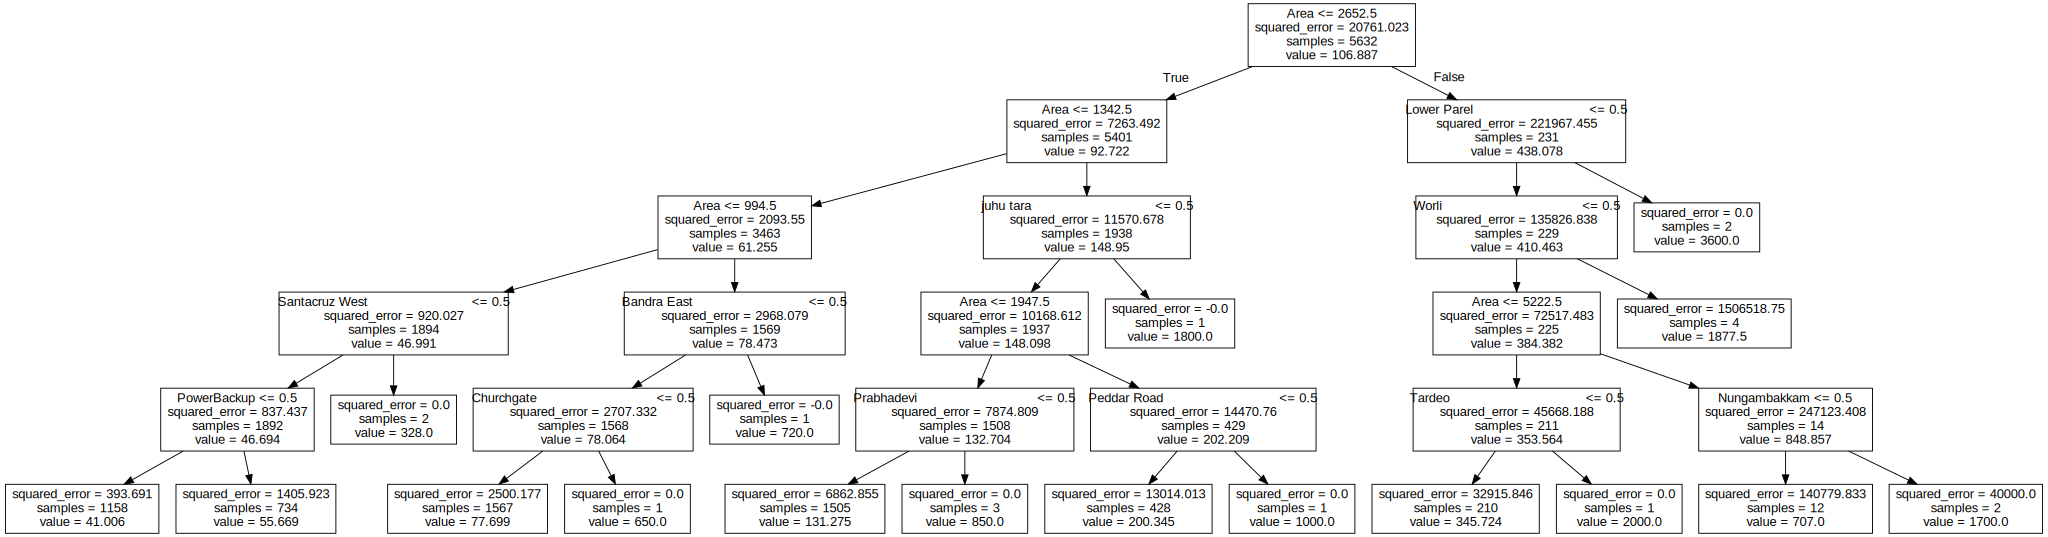

In [ ]:
# Update the selected_features list to match the number of features in the model
selected_features = model2.feature_names_in_

# Export the tree graph again
tree_graph = tree.export_graphviz(model2, out_file=None, feature_names=selected_features)
graphviz.Source(tree_graph)

<div class="alert alert-warning">
<p>The leaves indicate the splitting criteria. <br> The branches represent True or False values.
</p>
</div>

In [18]:
df_X.shape

(7510, 721)

In [19]:
df_Y.shape

(7510, 1)

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Model Training ⚙️ </strong></center></h3>
</div>

In [20]:
df_final=pd.read_csv(r'/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/The_OneHotFinal.csv')

In [21]:
df_final = df_final.drop(columns="Gymnasium")
df_final = df_final.drop(columns="24X7Security")

In [22]:
DF_X=df_final
DF_Y=df_Y

In [23]:
DF_Y.head()

,Price
0,48.5
1,45.0
2,67.0
3,45.0
4,50.0


In [24]:
(DF_X.shape,DF_Y.shape)

((7510, 723), (7510, 1))

In [ ]:
x=DF_X.fillna(0)
y=DF_Y.fillna(0)

In [25]:
# feature_names = merged.columns
# X = merged[feature_names]
# y = merged['Price']

# train_X, val_X, train_y, val_y = train_test_split(DF_X,DF_Y, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(DF_X,DF_Y,random_state=42)

In [26]:
from sklearn.metrics import mean_squared_error
def train_model(m,name):
    model = m
    model.fit(X=train_X, y=train_y)
    predictions = model.predict(val_X)
    mse = mean_squared_error(val_y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(val_y, predictions)
    print("{0} rmse {1} r2 {2}".format(name,rmse,r2))

train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
train_model(RandomForestRegressor(n_estimators=150,max_depth=100),"Random Forest Regressor")
train_model(XGBRegressor(n_estimators=600),"XGBoost Regressor")


Decision Tree Regressor rmse 85.17940701680223 r2 0.5555934040117381
Random Forest Regressor rmse 68.31225027923242 r2 0.7141695751227022
XGBoost Regressor rmse 75.25387336801153 r2 0.6531282047636113


In [27]:
selected_features

['Area',
 'No. of Bedrooms',
 'AC',
 'Gas connection',
 'Power Backup',
 'SwimmingPool',
 'Childrenplayarea']

In [45]:
user_input = [1250,2,0,1,1,0,1]
location='Sector 18 Kharghar                     '
test_input=np.array(DF_X.columns==location,dtype=int)
test_input[:7]=user_input
print(test_input)

[1250    2    0    1    1    0    1    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [46]:
import pandas as pd
rf = RandomForestRegressor(max_depth= None, min_samples_split =  2, n_estimators =  200)
rf.fit(X=train_X, y=train_y)
predictions = rf.predict(val_X)

predicted_price = rf.predict([test_input])[0]

print(f"Predicted price: {predicted_price} lakhs")

print(test_input)


Predicted price: 65.52066995 lakhs
[1250    2    0    1    1    0    1    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  

In [30]:
predicted_price = rf.predict([test_input])[0]
print(f"Predicted price: {predicted_price} lakhs")

Predicted price: 108.10679684285716 lakhs


In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd

In [32]:
# Assuming DF_X and DF_Y are already defined as your features and target variable
X_train, X_test, y_train, y_test = train_test_split(DF_X, DF_Y, test_size=0.2, random_state=42)


In [ ]:

def grid_search_linear_regression(X_train, y_train, X_test, y_test):
    param_grid = {}  # Add parameters for Linear Regression if needed
    grid_search = GridSearchCV(estimator=LinearRegression(),
                               param_grid=param_grid,
                               scoring='r2',
                               cv=5,
                               verbose=1,
                               n_jobs=6)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters for LinearRegression: {grid_search.best_params_}")
    print(f"Best R^2 score for LinearRegression: {grid_search.best_score_}")
    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    print(f"Test R^2 score for LinearRegression: {r2_score(y_test, y_pred)}")
    return best_model

grid_search_linear_regression(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for LinearRegression: {}
Best R^2 score for LinearRegression: -1245043532552907.8
Test R^2 score for LinearRegression: 0.6448138005558839


LinearRegression()

In [ ]:
def grid_search_decision_tree(X_train, y_train, X_test, y_test):
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(estimator=DecisionTreeRegressor(),
                               param_grid=param_grid,
                               scoring='r2',
                               cv=5,
                               verbose=1,
                               n_jobs=6)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters for DecisionTree: {grid_search.best_params_}")
    print(f"Best R^2 score for DecisionTree: {grid_search.best_score_}")
    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    print(f"Test R^2 score for DecisionTree: {r2_score(y_test, y_pred)}")
    return best_model

grid_search_decision_tree(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 2}
Best R^2 score for DecisionTree: 0.5108317636792226
Test R^2 score for DecisionTree: 0.3960490607366336


DecisionTreeRegressor()

In [ ]:

def grid_search_random_forest(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                               param_grid=param_grid,
                               scoring='r2',
                               cv=5,
                               verbose=1,
                               n_jobs=6)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters for RandomForest: {grid_search.best_params_}")
    print(f"Best R^2 score for RandomForest: {grid_search.best_score_}")
    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    print(f"Test R^2 score for RandomForest: {r2_score(y_test, y_pred)}")
    return best_model

grid_search_random_forest(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for RandomForest: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 50}
Best R^2 score for RandomForest: 0.5673299704085315
Test R^2 score for RandomForest: 0.7020788809529636


RandomForestRegressor(max_depth=30, n_estimators=50)

In [42]:
import pickle

RandomForest = '/content/drive/MyDrive/MPSTME/SEM IV/Machine Learning/Avnish/RandomForest.pkl'
with open(RandomForest, 'wb') as f:
    pickle.dump(rf, f)

In [43]:
import sklearn
print(sklearn.__version__)

1.2.2
